# Notas 

- Modelo a nivel instancia

    -Baseline
        - Regresión lineal simple
    - Caso de uso:
        - Una nueva manera de medir el costo del crédito vs CAT
        - Revisar sesgos en el pricing 
    - Variable objetivo: tasa de interés - regresión continua
    - Modelos propuestos 
        - Jerarquico
        - Regresión lineal simple
        - Dinamico:
            - Por mes
- Modelo a nivel mensual del monto otorgado
    - Caso de uso: 
    - Variable objetivo:
        - Monto otorgado
        - Número de crèditos
    - Modelo propuesto
        - Jerarquico
        - Dinamico
        
## Preguntas
- Preguntar por tamañano de la base con respecto a su experiencia
- Uso de otro software
- Mostrar propuestas

## Actividades
- Correr modelo simple / Enrique
- Exploración tomando a consideración la tasa de interés / Sandy 
- Investigar el origen de los datos / Marco

## Referencias
- http://portafoliodeinformacion.cnbv.gob.mx/bm1/Paginas/carteravivienda.aspx

Subencabezado del módulo de contexto
Atención a alumnos: Lunes a Jueves de 12:00 a 13:00 hrs


# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))

# Datos

In [2]:
df = pd.read_csv(
    "./data/data1.csv",
    encoding="latin-1"
)
df.head()

,sector,cve_periodo,nombre_publicacion,dl_estado,dl_municipio,dat_ingreso_mensual_bruto,dat_valor_vivienda_originacion,tipo_acreditado,dl_tipo_comprobacion,dat_ai_edad_acred,dl_genero,numero de crédito,dat_monto_orig_cred,dl_destino_credito,dl_producto_hipotecario,Tipo de Crédito,dl_segmento_vivienda,tasa_ponderada
0,BANCA MÚLTIPLE,201912,CIBanco,VERACRUZ,TANTOYUCA,6392.0,28033.0,Asalariado Privado,Asalariado,33,Femenino,Crédito 760,28033.0,"Mejoras, Ampliaciones y/o Remodelaciones",Mejora Tu Hogar de Infonavit,Sin cofinanciamiento,Remodelación o mejoramiento con gtía otorg Ban...,16.5
1,BANCA MÚLTIPLE,201912,CIBanco,VERACRUZ,TIERRA BLANCA,8496.0,13341.0,Asalariado Privado,Asalariado,25,Masculino,Crédito 714,13341.0,"Mejoras, Ampliaciones y/o Remodelaciones",Mejora Tu Hogar de Infonavit,Sin cofinanciamiento,Remodelación o mejoramiento con gtía otorg Ban...,16.5
2,BANCA MÚLTIPLE,201912,CIBanco,VERACRUZ,URSULO GALVAN,4533.0,19521.0,Asalariado Privado,Asalariado,43,Masculino,Crédito 757,19521.0,"Mejoras, Ampliaciones y/o Remodelaciones",Mejora Tu Hogar de Infonavit,Sin cofinanciamiento,Remodelación o mejoramiento con gtía otorg Ban...,16.5
3,BANCA MÚLTIPLE,201912,CIBanco,VERACRUZ,XALAPA,3434.0,14897.0,Asalariado Privado,Asalariado,28,Femenino,Crédito 751,14897.0,"Mejoras, Ampliaciones y/o Remodelaciones",Mejora Tu Hogar de Infonavit,Sin cofinanciamiento,Remodelación o mejoramiento con gtía otorg Ban...,16.5
4,BANCA MÚLTIPLE,201912,CIBanco,YUCATAN,CANSAHCAB,3878.0,12291.0,Asalariado Privado,Asalariado,44,Femenino,Crédito 976,12291.0,"Mejoras, Ampliaciones y/o Remodelaciones",Mejora Tu Hogar de Infonavit,Sin cofinanciamiento,Remodelación o mejoramiento con gtía otorg Ban...,16.5


In [44]:
df.nombre_publicacion.value_counts()

Ve por Más               212070
BBVA México              145566
Banca Mifel              145011
CIBanco                  106972
Scotiabank                93989
Monex                     90899
Banorte                   85620
HSBC                      81493
Santander                 73637
BanCoppel                 37652
Banamex                   29439
Santander Vivienda        13299
Banregio                   6868
Afirme                     5083
Banjército                 2555
Banco del Bajío            1748
Inbursa                    1742
ION Financiera              343
Banco Azteca                 67
Banobras                     47
Nafin                        46
Bancomext                    30
Autofin                      18
Multiva                      17
Bansí                        14
Banco Ahorro Famsa           11
Invex                        10
Inmobiliario Mexicano         1
Metrofinanciera               1
Name: nombre_publicacion, dtype: int64

In [45]:
df.sector.value_counts()

BANCA MÚLTIPLE                               1117927
SOCIEDADES FINANCIERAS DE OBJETO MULTIPLE      13643
BANCA DE DESARROLLO                             2678
Name: sector, dtype: int64

In [47]:
df[
    [
        'sector',
        'nombre_publicacion'
    ]
].value_counts().sort_index()

sector                                     nombre_publicacion   
BANCA DE DESARROLLO                        Bancomext                    30
                                           Banjército                 2555
                                           Banobras                     47
                                           Nafin                        46
BANCA MÚLTIPLE                             Afirme                     5083
                                           Autofin                      18
                                           BBVA México              145566
                                           BanCoppel                 37652
                                           Banamex                   29439
                                           Banca Mifel              145011
                                           Banco Ahorro Famsa           11
                                           Banco Azteca                 67
                                   

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134249 entries, 0 to 1134248
Data columns (total 18 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   sector                          1134249 non-null  object 
 1   cve_periodo                     1134249 non-null  int64  
 2   nombre_publicacion              1134249 non-null  object 
 3   dl_estado                       1134248 non-null  object 
 4   dl_municipio                    1134248 non-null  object 
 5   dat_ingreso_mensual_bruto       1134249 non-null  float64
 6   dat_valor_vivienda_originacion  1134249 non-null  float64
 7   tipo_acreditado                 1134249 non-null  object 
 8   dl_tipo_comprobacion            1134249 non-null  object 
 9   dat_ai_edad_acred               1134249 non-null  int64  
 10  dl_genero                       1134249 non-null  object 
 11  numero de crédito               1134249 non-null  object 
 12  

In [4]:
df.isna().sum().sort_values()

sector                                0
Tipo de Crédito                       0
dl_destino_credito                    0
dat_monto_orig_cred                   0
numero de crédito                     0
dl_genero                             0
dat_ai_edad_acred                     0
dl_segmento_vivienda                  0
dl_tipo_comprobacion                  0
dat_valor_vivienda_originacion        0
dat_ingreso_mensual_bruto             0
nombre_publicacion                    0
cve_periodo                           0
tipo_acreditado                       0
tasa_ponderada                        0
dl_municipio                          1
dl_estado                             1
dl_producto_hipotecario           37768
dtype: int64

# Primer exploración

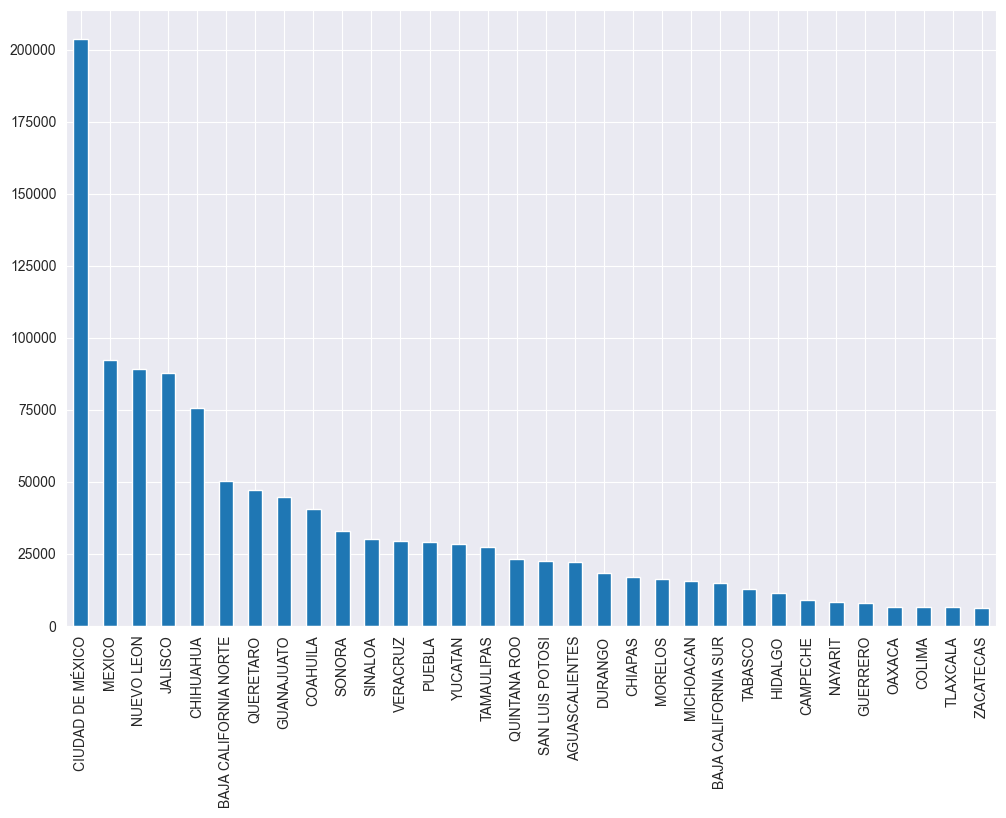

In [5]:
df.dl_estado.value_counts().plot(
    kind='bar',
    figsize = (12,8)
);

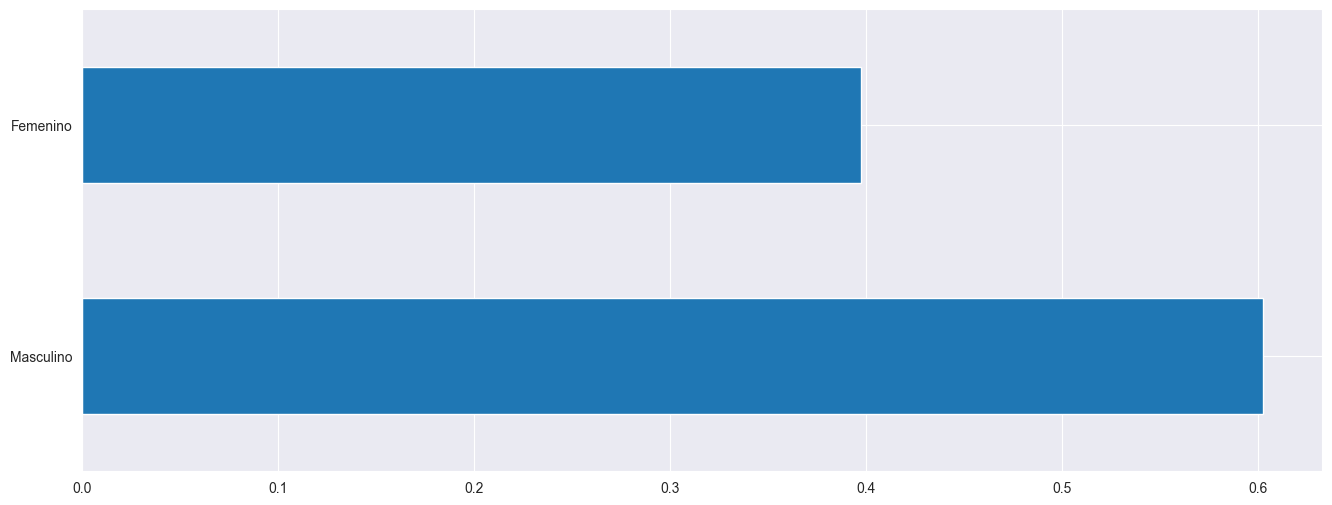

In [6]:
df.dl_genero.value_counts(
    normalize=True,
    dropna=False
).plot(kind='barh');

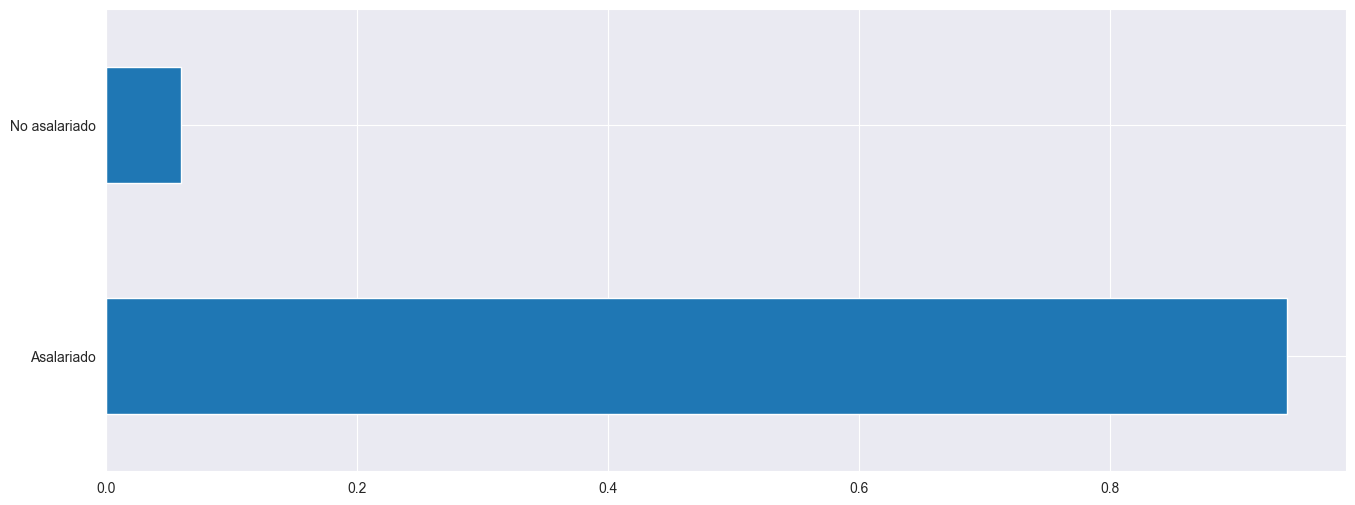

In [7]:
df.dl_tipo_comprobacion.value_counts(
    normalize=True,
    dropna=False
).plot(kind='barh');

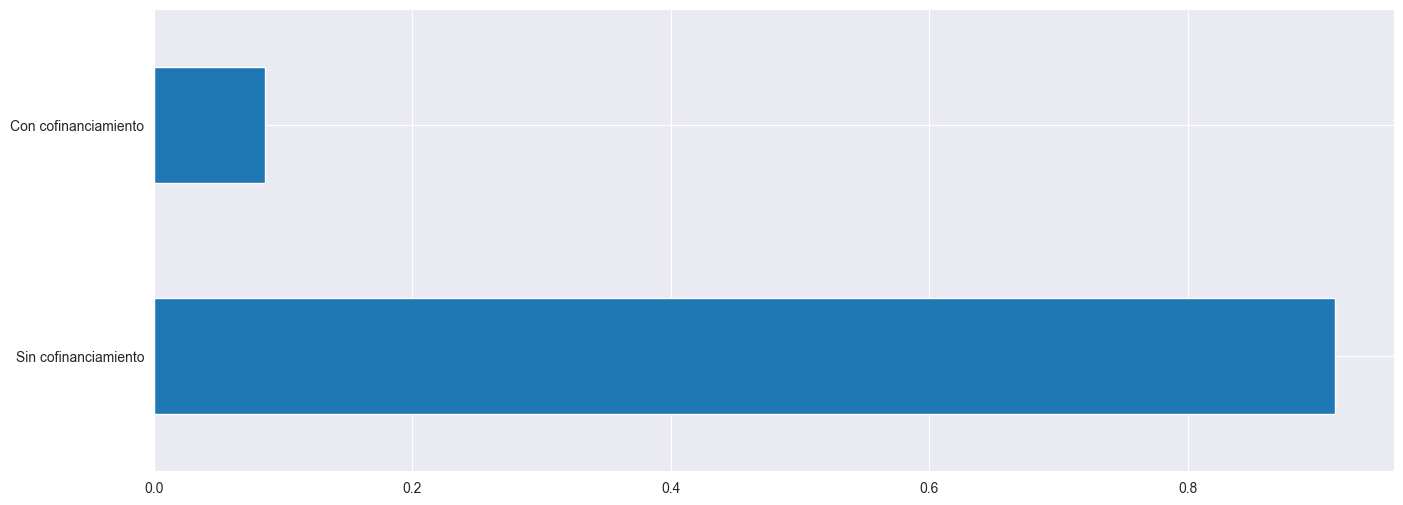

In [8]:
df["Tipo de Crédito"].value_counts(
    normalize=True,
    dropna=False
).plot(kind='barh');

In [9]:
df.dl_producto_hipotecario.value_counts().shape

(224,)

# Primer transformación

## Filtros

In [10]:
df = df.dropna(
    subset=[
        "dl_estado"
    ]
)

In [11]:
df.isna().sum().sort_values()

sector                                0
Tipo de Crédito                       0
dl_destino_credito                    0
dat_monto_orig_cred                   0
numero de crédito                     0
dl_genero                             0
dat_ai_edad_acred                     0
dl_segmento_vivienda                  0
dl_tipo_comprobacion                  0
dat_valor_vivienda_originacion        0
dat_ingreso_mensual_bruto             0
dl_municipio                          0
dl_estado                             0
nombre_publicacion                    0
cve_periodo                           0
tipo_acreditado                       0
tasa_ponderada                        0
dl_producto_hipotecario           37768
dtype: int64

## Fechas

In [12]:
df['fecha_originacion'] = pd.to_datetime(df.cve_periodo, format="%Y%m")

In [14]:
df.isna().sum().sort_values()

sector                                0
dl_segmento_vivienda                  0
Tipo de Crédito                       0
dl_destino_credito                    0
dat_monto_orig_cred                   0
numero de crédito                     0
dl_genero                             0
tasa_ponderada                        0
dat_ai_edad_acred                     0
tipo_acreditado                       0
dat_valor_vivienda_originacion        0
dat_ingreso_mensual_bruto             0
dl_municipio                          0
dl_estado                             0
nombre_publicacion                    0
cve_periodo                           0
dl_tipo_comprobacion                  0
fecha_originacion                     0
dl_producto_hipotecario           37768
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134248 entries, 0 to 1134248
Data columns (total 19 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   sector                          1134248 non-null  object        
 1   cve_periodo                     1134248 non-null  int64         
 2   nombre_publicacion              1134248 non-null  object        
 3   dl_estado                       1134248 non-null  object        
 4   dl_municipio                    1134248 non-null  object        
 5   dat_ingreso_mensual_bruto       1134248 non-null  float64       
 6   dat_valor_vivienda_originacion  1134248 non-null  float64       
 7   tipo_acreditado                 1134248 non-null  object        
 8   dl_tipo_comprobacion            1134248 non-null  object        
 9   dat_ai_edad_acred               1134248 non-null  int64         
 10  dl_genero                       1134248 no

In [53]:
df['pct_enganche'] = 1-df['dat_monto_orig_cred']/df['dat_valor_vivienda_originacion']

In [54]:
df['pct_enganche'].describe()

count    1.134248e+06
mean    -6.568615e-01
std      8.771737e+02
min     -9.341990e+05
25%      0.000000e+00
50%      5.000000e-02
75%      2.818671e-01
max      9.999571e-01
Name: pct_enganche, dtype: float64

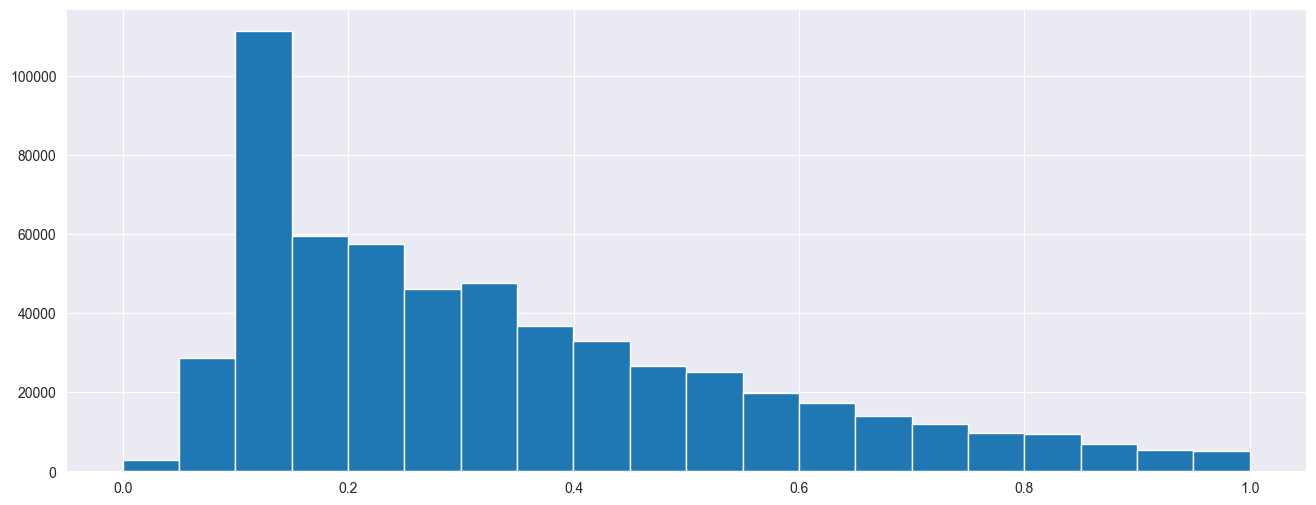

In [55]:
df[df['pct_enganche'] > 0].pct_enganche.hist(bins=20);

# Segunda exploración

In [38]:
df_pivot_1 = df.pivot_table(
    index = df.fecha_originacion.dt.to_period('M'),
    aggfunc={
        'dat_monto_orig_cred':[sum, 'count','mean', 'median'],
        'dat_ai_edad_acred':['mean'],
        'dat_ingreso_mensual_bruto':['mean', 'median']
    }
)

df_pivot_1.columns = [
    "edad_promedio",
    "ingreso_promedio",
    "mediana_ingreso",
    
    "creditos",
    "promedio_monto",
    "mediana_monto",
    "monto_originado",

]

df_pivot_1.head()

,edad_promedio,ingreso_promedio,mediana_ingreso,creditos,promedio_monto,mediana_monto,monto_originado
fecha_originacion,,,,,,,
2019-01,39.657416,58660.267806,13240.112,19890,628200.844947,54885.00,1.249491e+10
2019-02,39.437239,63106.567969,13093.575,22068,656724.278876,52557.00,1.449259e+10
2019-03,39.868631,75084.110610,13722.600,32009,570798.310017,56166.00,1.827068e+10
2019-04,39.395366,47127.985809,12088.630,30339,518375.337855,48655.65,1.572699e+10
2019-05,40.400877,141965.475072,18367.000,26003,694787.608759,86347.00,1.806656e+10


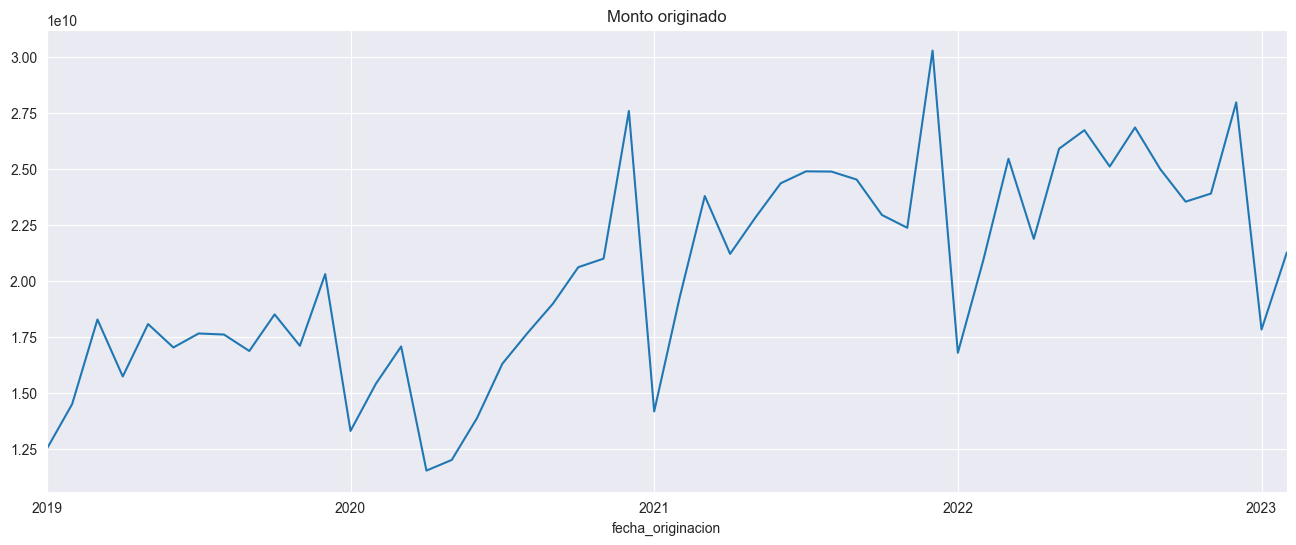

In [30]:
df_pivot_1.monto_originado.plot();
plt.title("Monto originado");

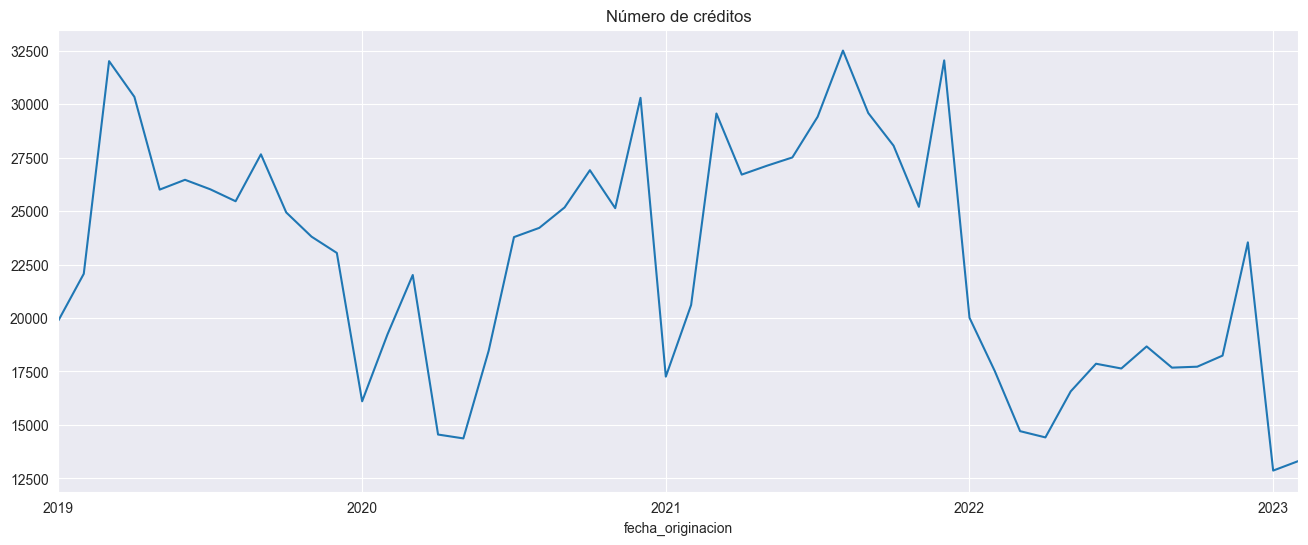

In [31]:
df_pivot_1.creditos.plot();
plt.title("Número de créditos");

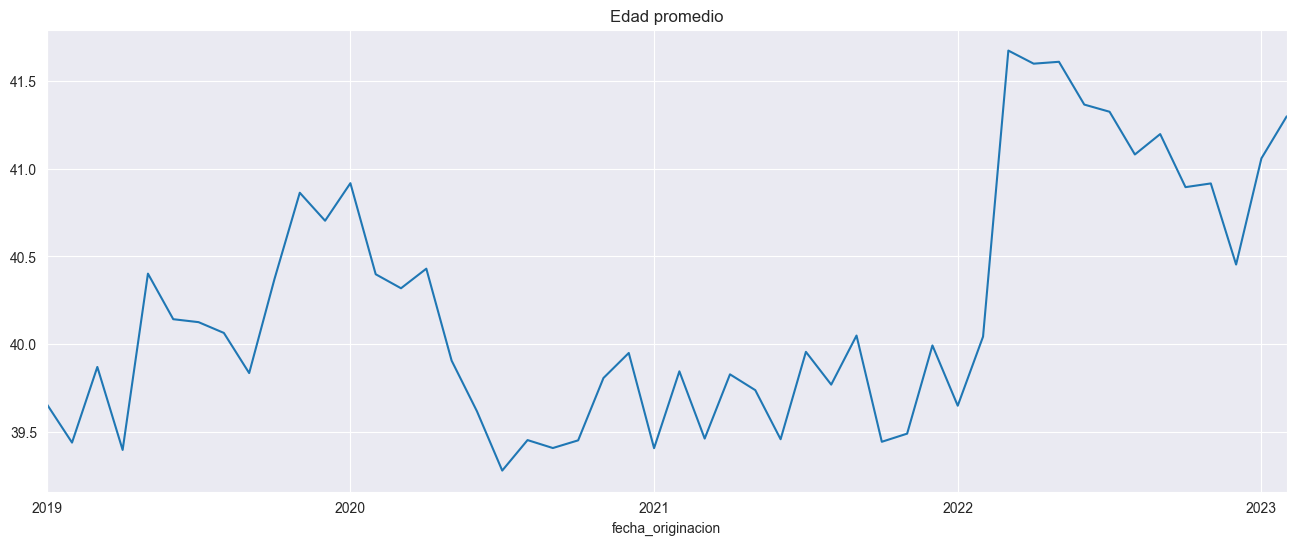

In [32]:
df_pivot_1.edad_promedio.plot()
plt.title("Edad promedio");

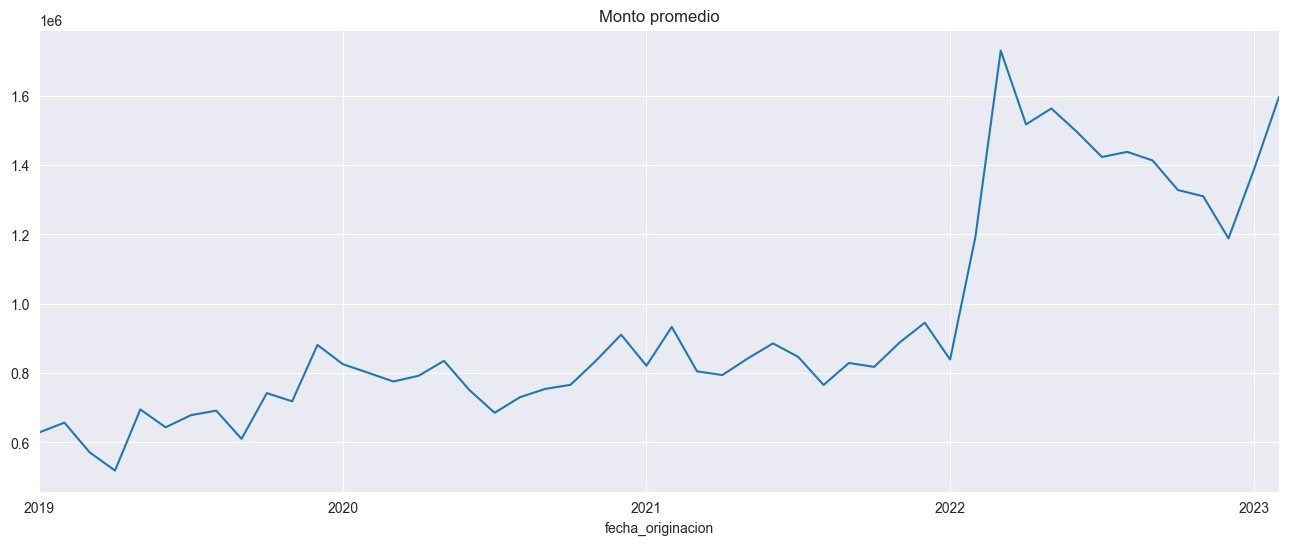

In [34]:
df_pivot_1.promedio_monto.plot()
plt.title("Monto promedio");

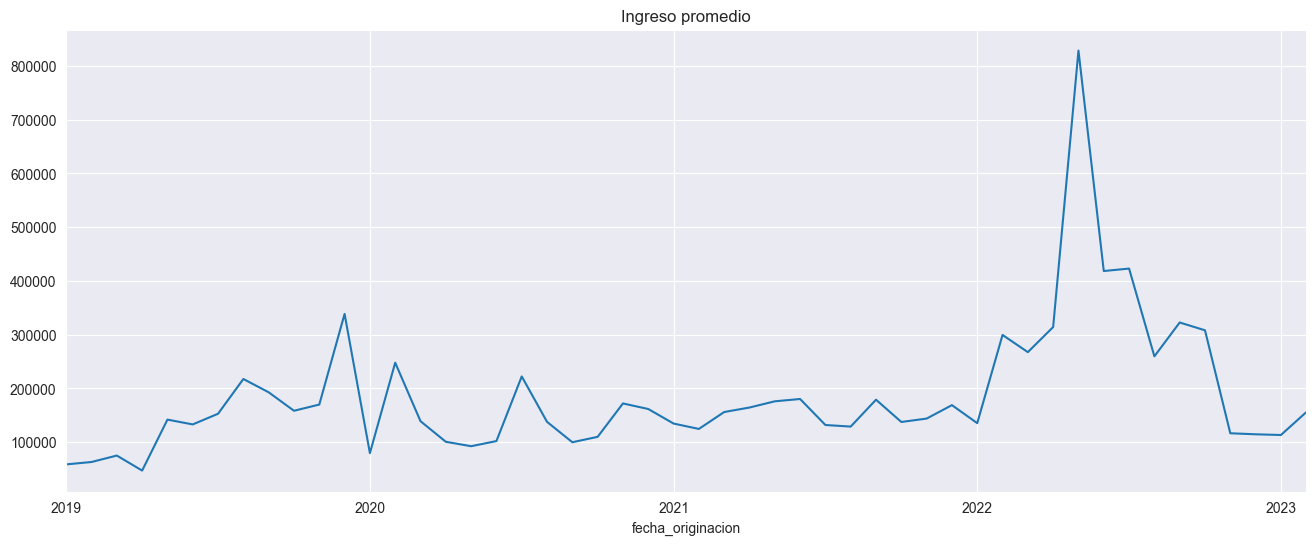

In [39]:
df_pivot_1.ingreso_promedio.plot()
plt.title("Ingreso promedio");

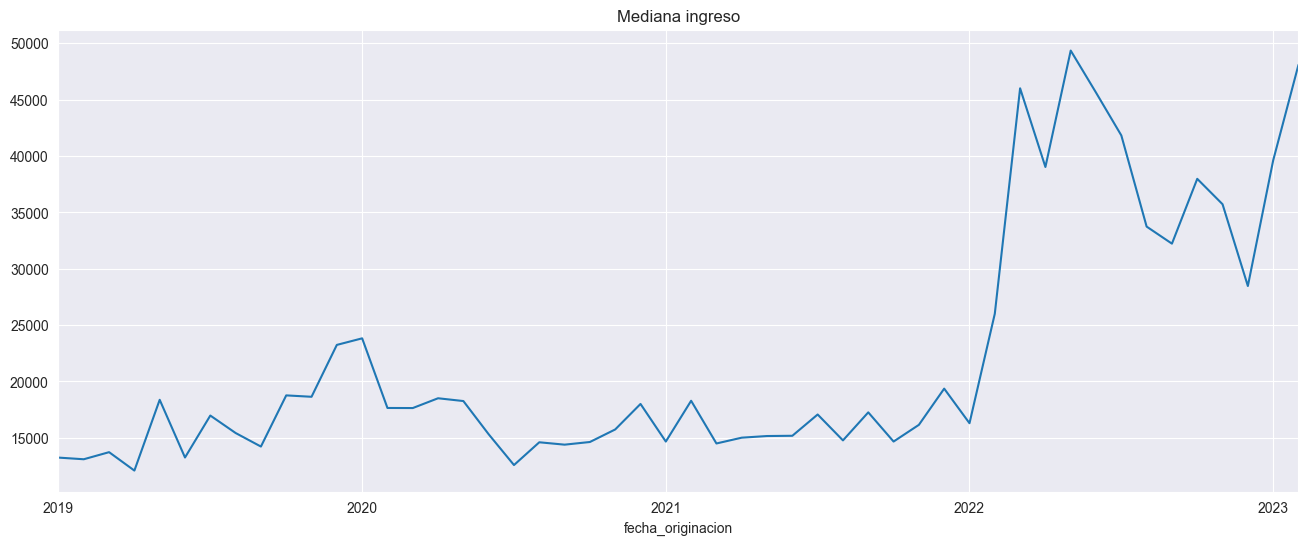

In [40]:
df_pivot_1.mediana_ingreso.plot()
plt.title("Mediana ingreso");